# Ejemplo: Aplicacion de un Algoritmo Genético (AG) básico#



In [2]:
# Importando librerias
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definiendo los hipérparametros
DNA_SIZE = 30            # longitud del ADN (cromosoma)
POP_SIZE = 50            # tamaño de la población inicial (Población constante durante las iteraciones)
CROSS_RATE = 0.8         # Probabilidad de apareamiento (Cruce de ADN)
MUTATION_RATE = 0.1      # Probabilidad de mutación
N_GENERATIONS = 100       # Generaciones (Iteraciones)
X_BOUND = [0, 50]         # Valor mínimo y máximo de X

[47.23618090452261, 88.62698535402964]


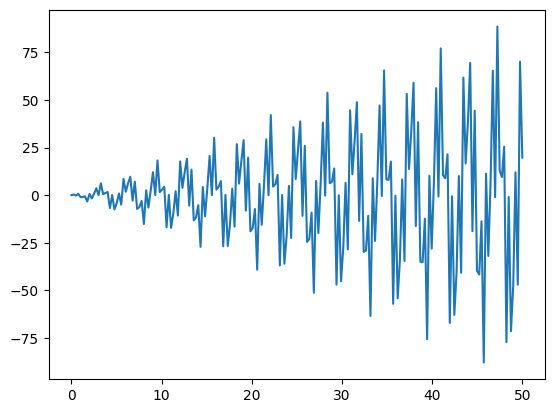

In [4]:
# Función a optimizar (objetivo hallar el máximo global)
def F(x): return np.sin(10*x)*x + np.cos(2*x)*x

x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))
print([x[np.argmax(F(x))], np.amax(F(x))])


Algoritmo Genético básico

In [5]:
# Aptitud diferente de cero para la selección
def get_fitness(pred): return pred + 1e-3 - np.min(pred) # pred = F(translateDNA(pop))

# Convertir el ADN binario a decimal y normalizarlo en el rango [0, 50]
def translateDNA(pop): return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

# Selección de la población (selección natural del más apto)
def select(pop, fitness):
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]

# proceso de apareamiento (Cruzamiento de genes)
def crossover(parent, pop):
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # seleccion de otro individuo de la poblacion
        cross_points = np.random.randint(0, 1, size=DNA_SIZE).astype(np.bool_)   # Seleccion de los puntos de cruzamiento
        parent[cross_points] = pop[i_, cross_points]                            # Apareamiento (Produccion de un hijo)
    return parent

# proceso de mutación
def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

In [485]:
2 ** np.arange(DNA_SIZE-1)[::-1]

array([268435456, 134217728,  67108864,  33554432,  16777216,   8388608,
         4194304,   2097152,   1048576,    524288,    262144,    131072,
           65536,     32768,     16384,      8192,      4096,      2048,
            1024,       512,       256,       128,        64,        32,
              16,         8,         4,         2,         1])

In [6]:
t = np.array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [7]:
# x -> numeric value -> escalate to function domain range
translateDNA(t)

49.05849448317522

In [18]:
mutate(t)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1])

Evaluacion y aplicacion del AG en el problema

In [19]:
# Generando la poblacion inicial
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE))
print(pop)
print(translateDNA(pop))

[[1 0 1 ... 1 0 0]
 [0 1 1 ... 1 1 1]
 [0 0 1 ... 1 1 0]
 ...
 [0 0 1 ... 0 1 1]
 [1 0 1 ... 1 1 0]
 [1 1 0 ... 1 0 1]]
[31.36389948 22.0263872   8.21834645 16.84360357 38.96911497  7.9089271
 32.35681209 11.55094617  5.99566685 22.81563484  9.76866811 15.55924538
 15.11144085 11.05397494 35.83385948 17.18505464 24.08470318 15.96185194
  9.93824318 19.33781064 13.52986383 34.9685035   8.1914703  34.03746242
 33.30255852  3.85549004 47.78471808 11.02202377  3.96799804 43.42797808
 37.6150437  44.1017636   8.53026189 25.86905363 48.46356464  6.93731136
  7.09714685  9.50111254 27.00003542 28.0498307  19.84698574 18.84728919
 39.62178625 44.18775597 13.20364919  9.32415101 36.2981018   7.03789197
 34.22125907 39.33131647]


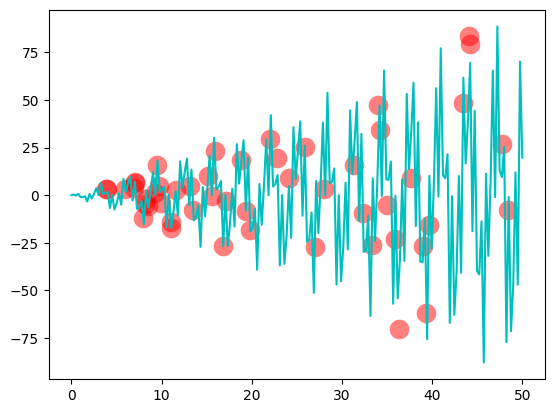

(Generation 0) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1]
(Generation 1) Most fitted DNA:  [1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1]
(Generation 2) Most fitted DNA:  [1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1]
(Generation 3) Most fitted DNA:  [1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0]
(Generation 4) Most fitted DNA:  [1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1]
(Generation 5) Most fitted DNA:  [1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1]
(Generation 6) Most fitted DNA:  [1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0]
(Generation 7) Most fitted DNA:  [1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1]
(Generation 8) Most fitted DNA:  [1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1]
(Generation 9) Most fitted DNA:  [1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1]
(Generation 10) Most fitted DNA:  [1 1 1 1 0 0 0 1

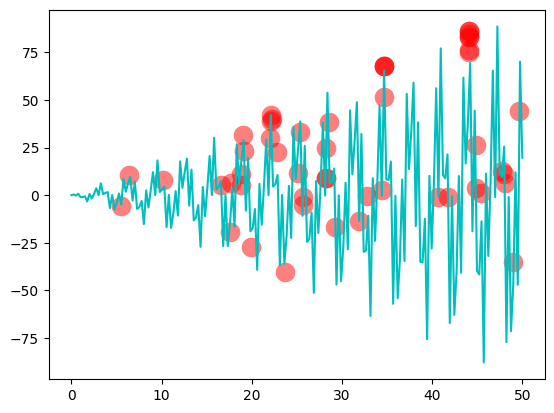

(Generation 99) Most fitted DNA:  [1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1]


In [20]:
PLOT_EVERY_GENERATIONS=100

for i in range(N_GENERATIONS):
    #import pdb; pdb.set_trace()
    F_values = F(translateDNA(pop))    # compute function value by extracting DNA

    if i % PLOT_EVERY_GENERATIONS == 0 or i == N_GENERATIONS-1: # plot every PLOT_EVERY_GENERATIONS generations
        # Plotear
        plt.plot(x, F(x), color='c')
        if 'sca' in globals(): sca.remove()
        sca = plt.scatter(translateDNA(pop), F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

    # Evolucion del AG
    fitness = get_fitness(F_values)
    print(f"(Generation {i}) Most fitted DNA: ", pop[np.argmax(fitness), :])
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # Reemplazando al padre por el hijo

plt.ioff(); plt.show()

# Tarea - PC 2

`objective function`: https://www.sfu.ca/~ssurjano/ackley.html

### Resources
* [Lecture 18 (Evolutionary Algorithms) - Video](https://www.youtube.com/watch?v=3-NiZPbkr7A)
* [lecture-13-learning-genetic-algorithms](https://ocw.mit.edu/courses/6-034-artificial-intelligence-fall-2010/resources/lecture-13-learning-genetic-algorithms/)
* [An Introduction to Genetic Algorithms](https://direct.mit.edu/books/book/4675/An-Introduction-to-Genetic-Algorithms)
* [Introduction to optimization with Genetic Algorithm](https://towardsdatascience.com/introduction-to-optimization-with-genetic-algorithm-2f5001d9964b)

In [491]:
# Definiendo los hipérparametros
DNA_SIZE = 30            # longitud del ADN (cromosoma)
POP_SIZE = 20            # tamaño de la población inicial (Población constante durante las iteraciones)
CROSS_RATE = 0.8         # Probabilidad de apareamiento (Cruce de ADN)
MUTATION_RATE = 0.1      # Probabilidad de mutación
N_GENERATIONS = 50       # Generaciones (Iteraciones)

### Defining Ackley Function
`source`: https://www.sfu.ca/~ssurjano/ackley.html

In [21]:
# Función a optimizar (objetivo hallar el máximo global)

a = 20
b = 0.2
c = 2*np.pi
d = 2
X_BOUND = [-32.768, 32.768]         # Valor mínimo y máximo de X

F = lambda X, Y: -a*np.exp(-b*np.sqrt((X**2 + Y**2)/d)) - np.exp((np.cos(c*X) + np.cos(c*Y))/d) + a + np.exp(1)

### Plotting Ackley function

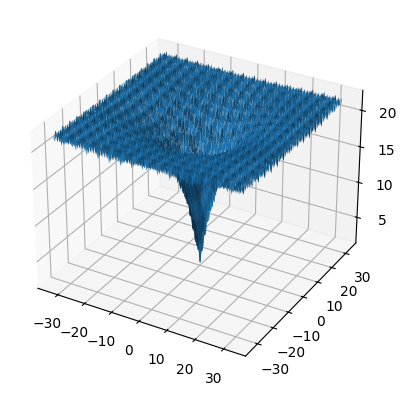

In [22]:
def plot_ackley(ax = None):
    if ax is None:
        ax = plt.figure().add_subplot(projection='3d')
    
    t = np.linspace(*X_BOUND, 200)
    
    X, Y = np.meshgrid(t, t)
    Z = F(X, Y)
    
    ax.plot_surface(X, Y, Z)
    return ax

plot_ackley()
plt.show()

In [24]:
# Generando la poblacion inicial
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE, d))
print(f"pop.shape: {pop.shape}")

pop.shape: (50, 30, 2)


In [25]:
# selecting a chromosome
s = pop[0, :]
print(s.shape)
s.T

(30, 2)


array([[0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 1]])

### Defining functions (fitness, translateDNA, crossover, select, mutate)

In [36]:
# Aptitud diferente de cero para la selección
def get_fitness(pred): # pred = F(x, y)
    # I want (x, y) that F(x, y) are close to 0, so if t = F(x, y) is a value close to 0, then 1/t is big
    # to avoid overflow (1/0) we are going to add 1e-3 to t
    return 1/(pred + 1e-3) 

# Convertir el ADN binario a decimal y normalizarlo en el rango [X_BOUND[0], X_BOUND[1]]
def translateDNA(pop, dna_size: int = DNA_SIZE):
    """
    pop: population
    """
    #import pdb; pdb.set_trace()
    x = pop[:, :, 0].dot(2 ** np.arange(dna_size)[::-1]) / float(2**dna_size-1) # range [0, 1]
    y = pop[:, :, 1].dot(2 ** np.arange(dna_size)[::-1]) / float(2**dna_size-1)

    x = x*(X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    y = y*(X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    
    return x, y
    

# Selección de la población (selección natural del más apto)
def select(pop, fitness, pop_size: int = POP_SIZE):
    idx = np.random.choice(np.arange(pop_size), size=pop_size, replace=True,
                           p=fitness/fitness.sum())

    
    return pop[idx]


# proceso de apareamiento (Cruzamiento de genes)
def crossover(parent, pop, *, pop_size: int = POP_SIZE, dna_size: int = DNA_SIZE, verbose: bool = False):
    if np.random.rand() < CROSS_RATE:
        #import pdb; pdb.set_trace()
        i_ = np.random.randint(0, pop_size, size=1)                             # seleccion de otro individuo de la poblacion
        cross_points = np.random.randint(0, 1, size=(dna_size, d)).astype(np.bool_)   # Seleccion de los puntos de cruzamiento
        if verbose:
            print(f"=== cross_points === \n{cross_points}")
            print(f"\n===couple === \nparent:\n{parent} \n\npair:\n{pop[i_]}")
        parent[cross_points] = pop[i_, cross_points]                            # Apareamiento (Produccion de un hijo)
    return parent


# proceso de mutación
def mutate(child, *, dna_size: int = DNA_SIZE, verbose: bool = False):
    for point in np.ndindex(dna_size, d):
        if np.random.rand() < MUTATION_RATE:
            if verbose:
                print(f"Mutated index: {point}")
            child[point] = 1 if child[point] == 0 else 0
    return child

### Select Process (EXAMPLE)

In [37]:
POP_SIZE_TEST = 3 # poblacion
DNA_SIZE_TEST = 4 # DNA_SIZE
pop_test = np.random.randint(2, size=(POP_SIZE_TEST, DNA_SIZE_TEST, d))
print(pop_test.shape)
pop_test

(3, 4, 2)


array([[[0, 1],
        [1, 0],
        [0, 1],
        [1, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        [1, 0]],

       [[0, 1],
        [0, 0],
        [1, 0],
        [0, 1]]])

In [38]:
x = pop_test[0, :, 0] # chromosome 0 - dimension 1
x

array([0, 1, 0, 1])

In [39]:
y = pop_test[0, :, 1] # chromosome 0 - dimension 2
y

array([1, 0, 1, 0])

In [40]:
## translate DNA of chromosome 0
x = x.dot(2 ** np.arange(DNA_SIZE_TEST)[::-1]) / float(2**DNA_SIZE_TEST-1)
x = x*(X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
x

-10.922666666666668

In [41]:
## translate DNA of chromosome 0
y = y.dot(2 ** np.arange(DNA_SIZE_TEST)[::-1]) / float(2**DNA_SIZE_TEST-1)
y = y*(X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
y

10.922666666666665

In [42]:
X, Y = translateDNA(pop_test, dna_size=DNA_SIZE_TEST)
X, Y # X[0], Y[0]

(array([-10.92266667, -28.39893333, -24.02986667]),
 array([ 10.92266667, -32.768     ,   6.5536    ]))

In [43]:
F_values = F(X, Y)    # compute function value by extracting DNA
F_values

array([18.04649679, 21.96740859, 21.1082466 ])

In [44]:
fitness = get_fitness(F_values)
fitness

array([0.05540935, 0.04551991, 0.0473726 ])

In [46]:
fitness/fitness.sum()

array([0.37362543, 0.30694093, 0.31943365])

In [45]:
np.arange(POP_SIZE_TEST)

array([0, 1, 2])

In [48]:
# select function
idx = np.random.choice(np.arange(POP_SIZE_TEST), size=POP_SIZE_TEST, replace=True,
                           p=fitness/fitness.sum())

idx

array([0, 0, 2])

In [49]:
# best individual selected based on fitness values
best = pop_test[idx]
best

array([[[0, 1],
        [1, 0],
        [0, 1],
        [1, 0]],

       [[0, 1],
        [1, 0],
        [0, 1],
        [1, 0]],

       [[0, 1],
        [0, 0],
        [1, 0],
        [0, 1]]])

In [63]:
## crossover
crossover(best[0], pop_test, dna_size=DNA_SIZE_TEST, pop_size=POP_SIZE_TEST, verbose=True)

=== cross_points === 
[[False False]
 [False False]
 [False False]
 [False False]]

===couple === 
parent:
[[0 1]
 [1 0]
 [0 1]
 [1 0]] 

pair:
[[[0 1]
  [0 0]
  [1 0]
  [0 1]]]


array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0]])

In [64]:
## mutate
mutate(best[0], dna_size=DNA_SIZE_TEST, verbose=True)

Mutated index: (0, 1)
Mutated index: (3, 0)


array([[0, 0],
       [1, 0],
       [0, 1],
       [0, 0]])

### MAIN

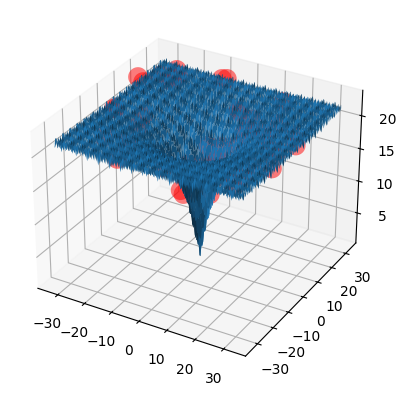

(Generation 0) Most fitted DNA:  [[1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0]
 [1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1]]
(Generation 1) Most fitted DNA:  [[1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0]
 [1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1]]
(Generation 2) Most fitted DNA:  [[1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1]
 [1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0]]
(Generation 3) Most fitted DNA:  [[1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1]
 [1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0]]
(Generation 4) Most fitted DNA:  [[1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0]
 [1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1]]
(Generation 5) Most fitted DNA:  [[1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1]
 [1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0]]
(Generation 6) Most fitted DNA:  [[1 0 0

In [65]:
PLOT_EVERY_GENERATIONS=1

ax = plt.figure().add_subplot(projection='3d')
sca = None

for i in range(N_GENERATIONS):
    X, Y = translateDNA(pop)
    F_values = F(X, Y)    # compute function value by extracting DNA

    if i % PLOT_EVERY_GENERATIONS == 0 or i == N_GENERATIONS-1: # plot every PLOT_EVERY_GENERATIONS generations
        # Plotear
        #import pdb; pdb.set_trace()
        plot_ackley(ax)
        if sca: sca.remove()
        #sca = ax.scatter(X, Y, F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.1) # 0.05
        sca = ax.scatter(X, Y, F_values, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05) # 0.05
        #plt.show()

    # Evolucion del AG
    fitness = get_fitness(F_values)
    print(f"(Generation {i}) Most fitted DNA: ", pop[np.argmax(fitness), :].T)
    pop = select(pop, fitness)
    pop_copy = pop.copy()
    for parent in pop:
        child = crossover(parent, pop_copy)
        child = mutate(child)
        parent[:] = child       # Reemplazando al padre por el hijo

plt.ioff(); plt.show()